In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t, gamma, poisson


0.5638633808516628
0.4361366191483371


[]

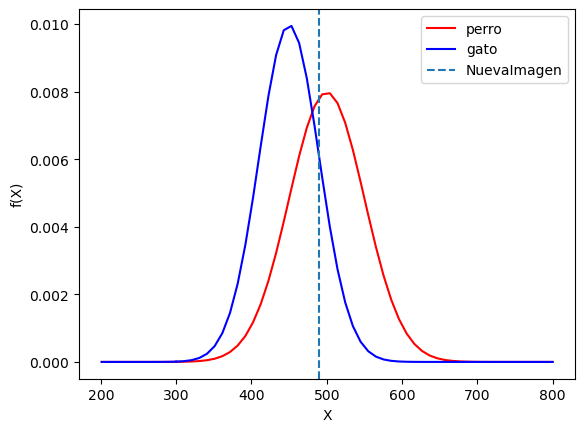

In [3]:
mu1, mu2 = 500, 450
sigma1, sigma2 = 50, 40

perro_marg = 0.5
gato_marg  = 1-perro_marg
perro = norm(mu1, sigma1)
gato  = norm(mu2 ,sigma2)

k = 490

fx = perro_marg*perro.pdf(k) + gato_marg*gato.pdf(k)

p_perro = perro.pdf(k)*perro_marg/fx
p_gato = gato.pdf(k)*gato_marg/fx


print(p_perro)
print(p_gato)

X = np.linspace(min(mu1,mu2) - 3*max(sigma1,sigma2),(max(mu1,mu2) + 6*max(sigma1,sigma2),201))
plt.plot(X, perro.pdf(X), color='r', label='perro')
plt.plot(X, gato.pdf(X), color= 'b', label='gato')
plt.axvline(k, linestyle='--', label='NuevaImagen')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("X")
plt.ylabel("f(X)")
plt.plot()

In [4]:
t.ppf(0.95, df=49)

1.6765508919142629

In [5]:
np.sqrt(50)*1.5

10.606601717798213

In [6]:
(6.5-6)/(1.5/np.sqrt(50))

2.3570226039551585

11.333333333333334
6


[]

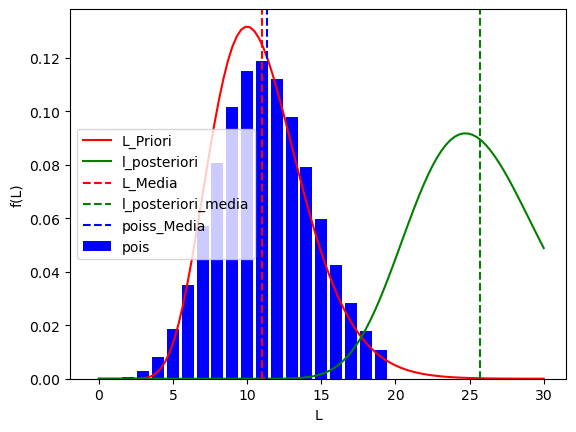

In [17]:
a, l1 = 10, 1
l0 = 1
l_priori = gamma(a,l1)


K = np.array([20, 5, 6, 30, 2, 5])
K_ = K.mean()
print(K_)
print(len(K))
pois = poisson(K_)
l_posteriori = gamma(a+K.sum()/(len(K)+1), len(K))

X = np.linspace(0, 30, 101)
Y = np.arange(20)
plt.plot(X, l_priori.pdf(X), color='r', label='L_Priori')
plt.plot(X, l_posteriori.pdf(X), color='g', label='l_posteriori')
plt.bar(Y, pois.pmf(Y), color='b', label='pois')

plt.axvline(l_priori.mean(), color='r', linestyle='--', label='L_Media')
plt.axvline(l_posteriori.mean(), color='g', linestyle='--', label='l_posteriori_media')
plt.axvline(pois.mean(), color='b', linestyle='--', label='poiss_Media')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("L")
plt.ylabel("f(L)")
plt.plot()

[]

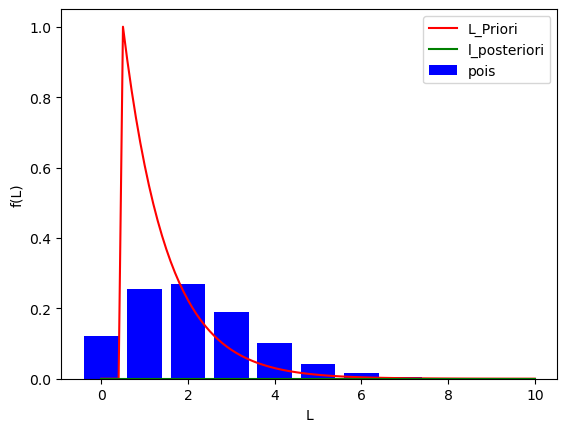

In [43]:

l_priori = gamma(1,1/2)
l_posteriori = gamma(213,100.5)
pois = poisson(212/100)
X = np.linspace(0, 10, 101)
Y = np.arange(8)

plt.plot(X, l_priori.pdf(X), color='r', label='L_Priori')
plt.plot(X, l_posteriori.pdf(X), color='g', label='l_posteriori')
plt.bar(Y, pois.pmf(Y), color='b', label='pois')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel("L")
plt.ylabel("f(L)")
plt.plot()